In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import cv2, os
import matplotlib.pyplot as plt

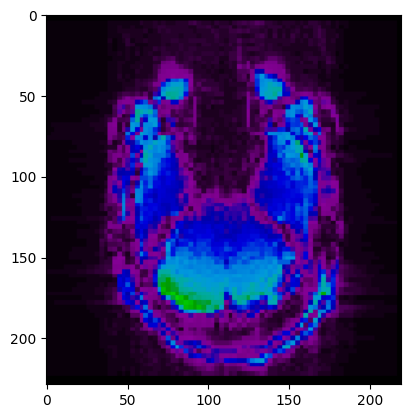

In [4]:
img = image.load_img("C:/Users/sathw/Asd/train/autism/100128679-208.png")
plt.imshow(img)

In [5]:
cv2.imread("C:/Users/sathw/Asd/train/autism/100128679-208.png").shape

(229, 220, 3)

In [6]:
train=ImageDataGenerator(
    rescale=1/255,
)
validation =ImageDataGenerator(
    rescale=1/255,
)

In [7]:
train_dataset = train.flow_from_directory('C:/Users/sathw/Asd/train/',target_size=(200,200),
                                         batch_size=3,
                                         class_mode ='binary')
validation_dataset = train.flow_from_directory('C:/Users/sathw/Asd/val/',target_size=(200,200),
                                         batch_size=3,
                                         class_mode ='binary')

Found 8531 images belonging to 2 classes.
Found 2134 images belonging to 2 classes.


In [2]:
# train_dataset[0]

In [8]:
train_dataset.class_indices

{'autism': 0, 'control': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
#CNN
model=keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(256,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(512,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    ##
    keras.layers.Flatten(),
    ##
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(2,activation='relu')                  
])


In [12]:
model.compile(loss='binary_crossentropy',
             optimizer= RMSprop(learning_rate=0.005),
              metrics=['accuracy'])

In [13]:
# model_fit =model.fit(
#                         train_dataset,
#                         steps_per_epoch=len(train_dataset) - 2820,
#                         epochs=10,
#                         # validation_data=validation_dataset,
#                         # validation_steps=len(validation_dataset) - 680
# )
model_fit =model.fit(train_dataset,
                    steps_per_epoch=2,
                    epochs=10,validation_data=validation_dataset)

Epoch 1/10
2/2 [==============================] - 69s 65s/step - loss: 10.0947 - accuracy: 0.5000 - val_loss: 7.6725 - val_accuracy: 0.4555
Epoch 2/10
2/2 [==============================] - 32s 32s/step - loss: 7.6978 - accuracy: 0.1667 - val_loss: 7.6725 - val_accuracy: 0.4555
Epoch 3/10
2/2 [==============================] - 32s 32s/step - loss: 7.6832 - accuracy: 0.3333 - val_loss: 7.6725 - val_accuracy: 0.4555
Epoch 4/10
2/2 [==============================] - 32s 32s/step - loss: 7.6978 - accuracy: 0.1667 - val_loss: 7.6725 - val_accuracy: 0.4555
Epoch 5/10
2/2 [==============================] - 32s 32s/step - loss: 7.6539 - accuracy: 0.6667 - val_loss: 7.6725 - val_accuracy: 0.4555
Epoch 6/10
2/2 [==============================] - 32s 32s/step - loss: 7.6832 - accuracy: 0.3333 - val_loss: 7.6725 - val_accuracy: 0.4555
Epoch 7/10
2/2 [==============================] - 32s 32s/step - loss: 7.6685 - accuracy: 0.5000 - val_loss: 7.6725 - val_accuracy: 0.4555
Epoch 8/10
2/2 [==========

In [ ]:
# dir_path='C:/Users/sathw/Asd/test'
# for i in os.listdir(dir_path):
#      img =image.load_img(dir_path+'//'+i,target_size=(200, 200))
#      plt.imshow(img)
#      plt.show()
#      x=image.img_to_array(img)
#      x=np.expand_dims(x,axis=0)
#      images=np.vstack([x])
#      val=model.predict(images)
#      if int(val[0][0]) == 0:
#          print("Yes Autism")
#      # else:
#      #   print("No Autism")

dir_path = 'C:/Users/sathw/Asd/val/autism/453329626-222.png'
# dir_path = 'C:/Users/sathw/Asd/train/autism/136228768-106.png'

img =image.load_img(dir_path,target_size=(200, 200))
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
print(val)
if int(val[0][0]) == 0:
    print("yes autism")
else:
    print("no autism")